In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
class Matrix:
    def __init__(self,
        data_file: str=r'//aka/work/hara.e/AMED/lib/dataset/annotations/test.json',
        preds_file: str=r'//aka/work/hara.e/AMED/YOLOX4/YOLOX_outputs/amed/metric.json',
    ):
        with open(preds_file, "r") as f:
            self.preds = json.load(f)
        with open(data_file, "r") as f:
            self.data = json.load(f)['annotations']

In [3]:
mat = Matrix()

In [4]:
data = {"id": [], "category_id": []}

for d in mat.data:
    data["id"].append(d["id"])
    data["category_id"].append(d["category_id"])

data = pd.DataFrame(data)
data

,id,category_id
0,0,1
1,5,1
2,14,3
3,20,4
4,44,1
...,...,...
8386,83868,1
8387,83879,1
8388,83880,1
8389,83895,1


In [5]:
preds = {"file_name": [], "preds": [], "reliability": []}

for f, p, r in zip(mat.preds["images"], mat.preds["preds"], mat.preds["reliability"]):
    preds["file_name"].append(f)
    preds["preds"].append(p)
    preds["reliability"].append(r)

preds = pd.DataFrame(preds)
preds

,file_name,preds,reliability
0,000000.jpg,[1],[0.6702192595725549]
1,000005.jpg,[1],[0.39854795568076185]
2,000014.jpg,[3],[0.7194438253348068]
3,000020.jpg,"[3, 4]","[0.5566915930620269, 0.26400401357988734]"
4,000044.jpg,"[1, 2]","[0.2881820499281247, 0.2530834369605799]"
...,...,...,...
8386,083868.jpg,"[1, 1]","[0.7601352048133947, 0.3681895426721553]"
8387,083879.jpg,[1],[0.7204177253610737]
8388,083880.jpg,[1],[0.721004648401891]
8389,083895.jpg,[1],[0.6664180484524458]


In [6]:
heat = np.zeros((5, 5))

for cat, pred, r in zip(data["category_id"], preds["preds"], preds["reliability"]):
    if pred == 0:
        heat[cat, pred] += 1
    elif cat in pred:
        heat[cat, cat] += 1
    else:
        arg = np.argmax(r)
        heat[cat, pred[arg]] += 1

heat

array([[   0.,    0.,    0.,    0.,    0.],
       [  60., 2897.,   36.,   44.,    0.],
       [ 106.,   52.,  995.,  200.,   18.],
       [ 180.,  118.,  179., 2472.,   13.],
       [  71.,   89.,  505.,  209.,  147.]])

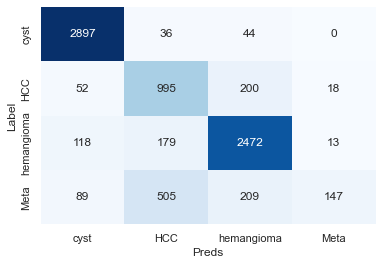

In [7]:
tics = ["cyst", "HCC", "hemangioma", "Meta"]
sns.heatmap(heat[1:, 1:].astype(np.int32), cmap="Blues", annot=True, fmt='d', cbar=False, xticklabels=tics, yticklabels=tics)
plt.xlabel("Preds")
plt.ylabel("Label")
plt.savefig(r"D:/Users/hara.e/Dropbox/ゼミ/AMED/fig/heatmap.pdf")

In [8]:
acc = []
for i in range(len(heat)):
    acc.append(heat[i, i] / (heat[i].sum() + heat[: , i].sum() - heat[i, i]))
acc[1: ]

[0.8789441747572816,
 0.47584887613582016,
 0.7238653001464129,
 0.1397338403041825]

In [9]:
precision = []
for i in range(len(heat)):
    precision.append(heat[i, i] / heat[: , i].sum())

precision[1: ]

[0.9179340937896071,
 0.5801749271137027,
 0.8451282051282051,
 0.8258426966292135]

In [10]:
recall = []
for i in range(len(heat)):
    recall.append(heat[i, i] / heat[i].sum())

recall[1: ]

D:\Users\hara.e\AppData\Local\Continuum\miniconda3\envs\amed\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.9539018768521568,
 0.7257476294675419,
 0.8345712356515868,
 0.14397649363369247]

In [11]:
f1 =[]
for p, r in zip(precision, recall):
    f1.append(2 * p * r / (p + r))
f1[1: ]

[0.9355724204747297,
 0.6448476992871031,
 0.8398165449295056,
 0.24520433694745622]